In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
car_data = pd.read_csv("car_evaluation.csv", header=None)


In [3]:
car_data.head()


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
car_data.shape

(1728, 7)

In [5]:
car_data.columns

Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [6]:
car_data.describe()

,0,1,2,3,4,5,6
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
car_data.columns = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class']
print(car_data.head())

  Buying  Maint Doors Persons Lug_boot Safety  Class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [9]:
car_data_encoded = pd.get_dummies(car_data, drop_first=True)

In [10]:
print("\nColumns after one-hot encoding:")
print(car_data_encoded.columns)


Columns after one-hot encoding:
Index(['Buying_low', 'Buying_med', 'Buying_vhigh', 'Maint_low', 'Maint_med',
       'Maint_vhigh', 'Doors_3', 'Doors_4', 'Doors_5more', 'Persons_4',
       'Persons_more', 'Lug_boot_med', 'Lug_boot_small', 'Safety_low',
       'Safety_med', 'Class_good', 'Class_unacc', 'Class_vgood'],
      dtype='object')


In [11]:
X = car_data_encoded.drop('Class_good', axis=1)
y = car_data_encoded['Class_good']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = rf_model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy * 100:.2f}%")

Accuracy of Random Forest Classifier: 96.53%


In [16]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.97      0.98       335
        True       0.47      0.73      0.57        11

    accuracy                           0.97       346
   macro avg       0.73      0.85      0.78       346
weighted avg       0.97      0.97      0.97       346



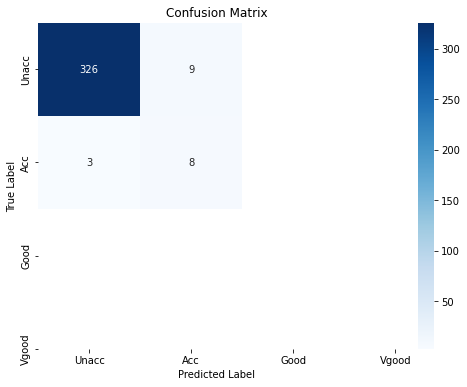

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Unacc', 'Acc', 'Good', 'Vgood'],yticklabels=['Unacc', 'Acc', 'Good', 'Vgood'])
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()